#EXERCISE-1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer
np.random.seed(1000)

In [2]:
A=np.random.randn(1000,10)

In [3]:
epsilon=np.random.randn(1000,1)

In [4]:
x=[]
for i in range(1,11):
  if i%2==0:
    x.append(np.random.uniform(i,i+1))
  if i%2!=0:
    x.append(np.random.uniform(-i-1,-i))
print(x)

[-1.5598060982531905, 2.3304600657948655, -3.6795264016693583, 4.690106332295438, -5.791543695407358, 6.066830606319292, -7.250688337950498, 8.29645037615345, -9.919538982700145, 10.753574141825613]


In [5]:
x_bar=np.array(x)
x_bar=x_bar.reshape(10,1)

In [6]:
x_bar.shape

(10, 1)

In [7]:
print(x_bar)

[[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]


In [8]:
A_x=A@x_bar

In [9]:
A_x.shape

(1000, 1)

In [10]:
np.matmul(A,x_bar).shape

(1000, 1)

In [11]:
y=A_x+epsilon

In [12]:
y.shape

(1000, 1)

In [13]:
def evalf(x,n):
  assert type(x) is np.ndarray and  len(x)==n
  f_val=np.linalg.norm(A@x - y)
  f_val=f_val**(2)
  f_val=(0.5)*f_val
  return f_val

In [14]:
x=np.array([0 for i in range(10)])
evalf(x,10)

253074145.7869687

In [15]:
def evalg(x,n):
  assert type(x) is np.ndarray 
  assert len(x) == n
  return A.T@ (np.matmul(A, x) - y)

In [16]:
evalg(x,10).shape

(10, 1000)

In [17]:
def evalh(x,n):
  assert type(x) is np.ndarray 
  assert len(x) == n 
  return A.T @ A

# **Que.2**

In [18]:
BACKTRACKING_LINE_SEARCH = 1

In [19]:
def compute_B_k(vi, y, B_k, n):
  assert type(vi) is np.ndarray and len(vi) == n
  assert type(B_k) is np.ndarray and len(y) == n 
  mu = 1 / np.dot(np.squeeze(np.asarray(y)), np.squeeze(np.asarray(vi)))
  I = np.identity(n)
  a_1 = np.outer(np.multiply(mu, vi), y.T)
  a_2 = np.outer(np.multiply(mu, y), vi.T)
  b_k = np.add(np.matmul(np.matmul(I - a_1, B_k), I - a_2), np.outer(np.multiply(mu, vi), vi.T) )
  return b_k

In [20]:
def compute_D_k(x,n):
  assert type(x) is np.ndarray and len(x) == n
  if np.linalg.det(evalh(x,n)) == 0:
    raise ValueError('Determinant of Hessian is zero')
  return np.linalg.inv(evalh(x,n))

In [21]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma, B_k): 
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  n = len(x)
  alpha = alpha_start
  p = - gradf 
  D_k = B_k
  while evalf(x + alpha*np.matmul(D_k,p), n) > evalf(x, n) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha  

In [22]:
def find_minimizer_Newton(start_x, n, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == n
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x,n)
  h_x = evalh(x,n)
  x_iter = []
  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  step_length = 1.0
  while (np.linalg.norm(g_x) > tol): 
    D_k = np.linalg.inv(evalh(x, n))
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha, rho, gamma, D_k)

    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    x_iter.append(x)
    k += 1 #increment iteration
    g_x = evalg(x, n) #compute gradient at new point
  return x, x_iter,k,np.linalg.norm(g_x)

In [23]:
n = 10
my_start_x = np.array([0 for i in range(10)])
my_start_x = my_start_x.reshape(10,1)
my_tol  = 1e-4
alpha =0.99
rho=0.5
gamma=0.5

xk_x = []
f_arr = []
t=[]
print("For Newton's Method : ")
time1 = timer()
x_star_newton , x_k,k,norm = find_minimizer_Newton(my_start_x, 10, my_tol, BACKTRACKING_LINE_SEARCH, alpha , rho, gamma)
time2 = timer()
for i in range(len(x_k)-1):
  xk_x.append(math.log(np.linalg.norm(x_k[i] - x_star_newton)))
  t.append(x_k[i] - x_star_newton)
  f_arr.append(math.log(np.linalg.norm(evalf(x_k[i],n) - evalf(x_star_newton,n))))
print("x_star:", x_star_newton, "\nx_bar:", x_bar)
print("f_star:", evalf(x_star_newton,n), "\nf_bar:", evalf(x_bar,n))
print("Time taken by Newton's method: ", time2-time1)
print('number of iteration taken by algorithm is',k)
print('gradient norm is ',norm)

For Newton's Method : 
x_star: [[-1.52615747]
 [ 2.35933586]
 [-3.71408745]
 [ 4.65508607]
 [-5.79228265]
 [ 6.05590254]
 [-7.25518888]
 [ 8.32369299]
 [-9.87348466]
 [10.71878165]] 
x_bar: [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]
f_star: 504.5963652036184 
f_bar: 508.51427768443995
Time taken by Newton's method:  0.0015615570000591106
number of iteration taken by algorithm is 5
gradient norm is  2.3931826436776857e-06


In [24]:
for i in range(3):
  print(np.linalg.norm(t[i+1])/np.linalg.norm(t[i]))

0.009999990100002756
0.009999009999280332
0.009900990119527501


In [25]:
evalf(x_star_newton,n)

504.5963652036184

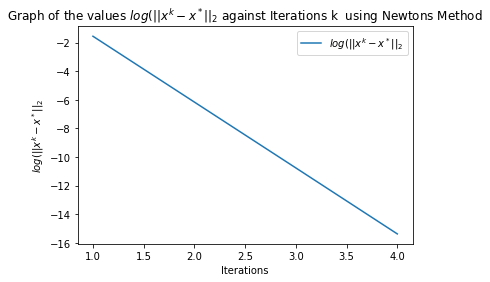

In [26]:
plt.plot([i+1 for i in np.arange(len(xk_x))], xk_x,label=r'$ $')
plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k  using Newtons Method')
plt.xlabel('Iterations')
plt.ylabel(r'$log(||x^k - x^*||_2$')
plt.legend(['$log(||x^k - x^*||_2$'])
plt.show()

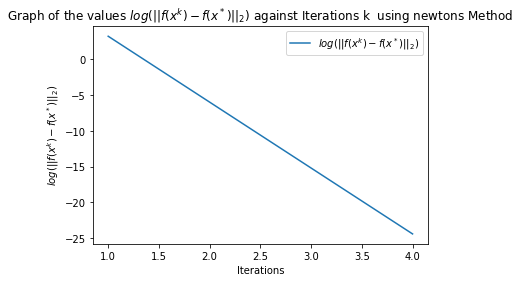

In [27]:
plt.plot([i+1 for i in np.arange(len(f_arr))], f_arr,label=r'$ $')
plt.title(r'Graph of the values $log(||f(x^k) - f(x^*)||_2)$ against Iterations k  using newtons Method')
plt.xlabel(r'Iterations')
plt.ylabel(r'$log(||f(x^k) - f(x^*)||_2)$')
plt.legend([r'$log(||f(x^k) - f(x^*)||_2)$'])
plt.show()

In [28]:
1/np.linalg.norm(t[-1])

4772896.658004743


The condition of Q-Linear is :$\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}\leq r$, Where $r\in(0,1)$

taking log both side, we get
$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq log(r)$$


Since $r\in (0,1)$

hence $log(r)< 0$ 

Hence the condition of Q-Linear becomes:

$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2) < 0$$

From the above plots, we can observe that:

$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)$ is negative. since in each iteration $log(||x^{k+1} - x^*||_2)$ decreases  

but $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} \approx 1 \ \ \forall k\ge4
$


Hence, we can say that the Convergence of the function is  Q-Linear.

now let's check for Q-superlinear i.e. $ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}$

here after 4 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change  \ \ \forall \ \  k \ge 4$

$ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} = 1 \\ \Rightarrow \ \ it  \ \ is \ \ not \ \ Q-superlinear$

let's check for Q-quadratic

 $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2}$

 since after 4 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change \ \ \forall \ \  k \ge 4 $

  $ \Rightarrow \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \approx  \frac{1}{||x^{k} - x^*||_2}$

  $\Rightarrow  \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \le M \ \  \forall  \ \ k  \ \ sufficiently \ \ large    \\ since \frac{1}{||x^{k} - x^*||_2} \ \ is \ \ increasing \ \  as \ \  k  \ \ increases   \\ \Rightarrow \ \  it \ \  is \ \ not \ \   Q-quadratic$



objective function value is 504.5963652036184



# **Que.3**

In [29]:
def find_minimizer_BFGS_scaling(start_x, n, tol, line_search_type, *args):
 
  assert type(start_x) is np.ndarray and len(start_x) == n 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x,n)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  B_k = np.identity(n)
  x_prev = x
  x_itr = []
  while (np.linalg.norm(g_x) > tol):
    step_length = compute_steplength_backtracking_scaled_direction(x_prev, g_x, alpha, rho, gamma, B_k)
    x_new = np.subtract(x_prev, np.multiply(step_length, np.matmul(B_k,g_x))) 
    g_x = evalg(x_new,n)
    s = np.subtract(x_new, x_prev)
    y = np.subtract(evalg(x_new,n), evalg(x_prev,n)) 
    B_k = compute_B_k(s, y, B_k, n)
    x_prev = x_new
    k += 1
    x_itr.append(x_new)
  return x_new,x_itr

In [30]:
n=10
x_start=np.array([0 for i in range(10)]).reshape(10,1)
alpha_start=0.99
rho=0.5
gamma=0.5
my_tol= 1e-6
x_bfgs = []
f_bfgs = []
t=[]
print("BFGS Method optimizers: ")
time1_bfgs = timer()
x_star_bfgs,x_k1 = find_minimizer_BFGS_scaling(x_start, n, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
time2_bfgs = timer()
print("x_star:", x_star_bfgs, "\nx_bar:", x_bar)
print("f_star:", evalf(x_star_bfgs,n), "\nf_bar:", evalf(x_bar,n))
print("Time taken by BFGS: ", time2_bfgs - time1_bfgs)
for i in range(len(x_k1)-1):
  x_bfgs.append(math.log(np.linalg.norm(x_k1[i] - x_star_bfgs)))
  t.append(x_k1[i] - x_star_bfgs)
  f_bfgs.append(math.log(np.linalg.norm(evalf(x_k1[i],n) - evalf(x_star_bfgs,n))))


BFGS Method optimizers: 
x_star: [[-1.52615747]
 [ 2.35933586]
 [-3.71408745]
 [ 4.65508607]
 [-5.79228265]
 [ 6.05590254]
 [-7.25518888]
 [ 8.32369299]
 [-9.87348467]
 [10.71878165]] 
x_bar: [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]
f_star: 504.5963652036184 
f_bar: 508.51427768443995
Time taken by BFGS:  0.022408195000025444


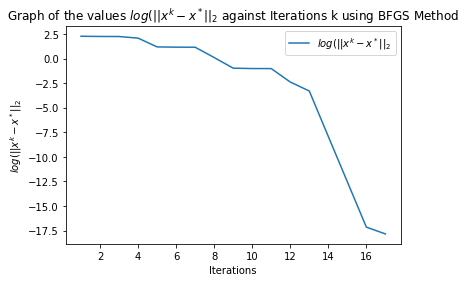

In [31]:
plt.plot([i+1 for i in np.arange(len(x_bfgs))], x_bfgs,label=r'$ $')
plt.title('Graph of the values $log(||x^k - x^*||_2$ against Iterations k using BFGS Method')
plt.xlabel('Iterations')
plt.ylabel('$log(||x^k - x^*||_2$')
plt.legend([r'$log(||x^k - x^*||_2$'])
plt.show()

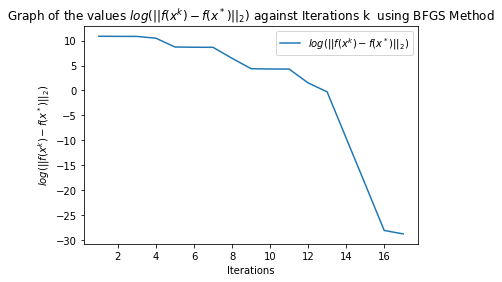

In [32]:
plt.plot([i+1 for i in np.arange(len(f_bfgs))], f_bfgs,label=r'$ $')
plt.title(r'Graph of the values $log(||f(x^k) - f(x^*)||_2)$ against Iterations k  using BFGS Method')
plt.xlabel(r'Iterations')
plt.ylabel(r'$log(||f(x^k) - f(x^*)||_2)$')
plt.legend([r'$log(||f(x^k) - f(x^*)||_2)$'])
plt.show()

In [33]:
evalf(x_star_bfgs,n)

504.5963652036184

In [34]:
for i in range(15):
  print(np.linalg.norm(t[i+1])/np.linalg.norm(t[i]))

0.9769633739890062
0.9954021478316833
0.848120508565328
0.40991787150771175
0.9739572793584607
0.9942120455810284
0.3502525600678373
0.33942096284461043
0.9619493854564216
0.9968424580237297
0.25482448342087527
0.401596740907243
0.009788369482096984
0.009999514030042124
0.00995000220943383



The condition of Q-Linear is :$\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}\leq r$, Where $r\in(0,1)$

taking log both side, we get
$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq log(r)$$


Since $r\in (0,1)$

hence $log(r)< 0$ 

Hence the condition of Q-Linear becomes:

$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2) < 0$$

From the above plots, we can observe that:

$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)$ is negative. since in each iteration $log(||x^{k+1} - x^*||_2)$ decreases  

but $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} \approx 1 \ \ \forall k\ge 15
$


Hence, we can say that the Convergence of the function is  Q-Linear.

now let's check for Q-superlinear i.e. $ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}$

here after 15 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change  \ \ \forall \ \  k \ge 15$

$ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} = 1 \\ \Rightarrow \ \ it  \ \ is \ \ not \ \ Q-superlinear$

let's check for Q-quadratic

 $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2}$

 since after 15 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change \ \ \forall \ \  k \ge 15 $

  $ \Rightarrow \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \approx  \frac{1}{||x^{k} - x^*||_2}$

  $\Rightarrow  \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \le M \ \  \forall  \ \ k  \ \ sufficiently \ \ large    \\ since \frac{1}{||x^{k} - x^*||_2} \ \ is \ \ increasing \ \  as \ \  k  \ \ increases   \\ \Rightarrow \ \  it \ \  is \ \ not \ \   Q-quadratic$

objective function value is 504.5963652036184

# **Que.4**





In [35]:
print("Time taken by Newton's method: ", time2-time1)
print("Time taken by BFGS: ", time2_bfgs - time1_bfgs)

Time taken by Newton's method:  0.0015615570000591106
Time taken by BFGS:  0.022408195000025444


objective function value for newtons method is  504.5963652036184

objective function value for bfgs is is 504.5963652036184

Time taken by Newton's method:  0.0015615570000591106

Time taken by BFGS:  0.022408195000025444

We can see that time taken by Newton's method to find the optimizer is comparatively less than the time taken by BFGS method. The value of optimizer is almost equal for both methods and the value of function at $x^*$ and $\bar{x}$ doesn't differ much.and I also observed that the Newton's method takes less iterations to terminate as compare to the BFGS method. Therefore, we can conclude that the Newton's method is faster than BFGS method for this question

we can also get close form solution for this question 
as solution of system of linear equation 

$A^TAx=A^Ty$
where x is optimum solution

In [38]:
viv=timer()
x_star=np.linalg.solve(np.matmul(A.T,A),np.matmul(A.T,y))
so=timer()
print('time taken by close form',so-viv)

0.00046443999963230453


In [37]:
evalf(x_star,n)

504.5963652036185

as we can see that time taken by close form solution is much more faster than another two algorithm that we discussed before